In [33]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random
style.use('fivethirtyeight')

# xs=np.array([1,2,3,4,5,6],dtype=np.float64)
# ys=np.array([5,4,6,5,6,7],dtype=np.float64)

In [34]:
#hm=how many dtapoints?
# variance=how many variables do we want?
def create_dataset(hm,variance,step=2,correlation=False):
    val=1
    ys=[]
    for i in range(hm):
        y=val+random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation=='pos':
            val +=step
        elif correlation and correlation=='neg':
            val -=step
    xs=[i for i in range(len(ys))]
    return np.array(xs,dtype=np.float64),np.array(ys,dtype=np.float64)


def best_fit_slope_and_intercept(xs,ys):
    m=( ( (mean(xs)*mean(ys)-mean(xs*ys))/
         (mean(xs)*mean(xs)-mean(xs**2)))
       )
    b=mean(ys)-m*mean(xs)
    return m,b

def squared_error(ys_orig,ys_line):
    return sum((ys_line-ys_orig)**2) 

def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line=[mean(ys_orig) for y in ys_orig]
    squared_error_regr=squared_error(ys_orig,ys_line)
    squared_error_y_mean=squared_error(ys_orig,y_mean_line)
    return(1-(squared_error_regr/squared_error_y_mean))


In [35]:
xs,ys=create_dataset(40,10,2,correlation='pos')


m,b=best_fit_slope_and_intercept(xs,ys)
print('[INFO]:Slope is {0} and x-intercept is {1}'.format(m,b))
    

[INFO]:Slope is 1.9298311444652898 and x-intercept is 2.468292682926851


In [36]:
regression_line=[] 
for x in xs:
    regression_line.append(m*x+b)


In [37]:
def predict_y(x):
    return(m*x+b)
predict_x=int(input('enter value of x to predict'))
pred=predict_y(predict_x)
print('[INFO] Predicted value of y is{}'.format(pred))
r_squared=coefficient_of_determination(ys,regression_line)
print('[INFO]R_Squared error is:{}'.format(r_squared))


enter value of x to predict34
[INFO] Predicted value of y is68.08255159474672
[INFO]R_Squared error is:0.9459884458324587


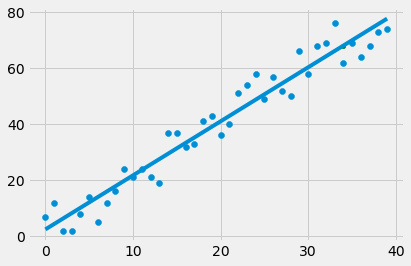

In [38]:
plt.scatter(predict_x,pred,s=20,color='g')
plt.scatter(xs,ys)
plt.plot(xs,regression_line)        
plt.show()

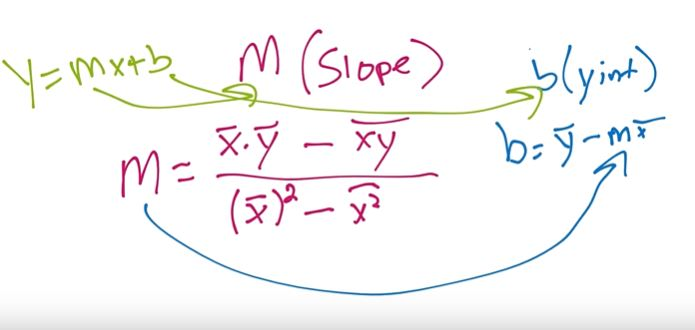

In [39]:
from IPython.display import  Image
Image(filename='linear_reg.jpg')

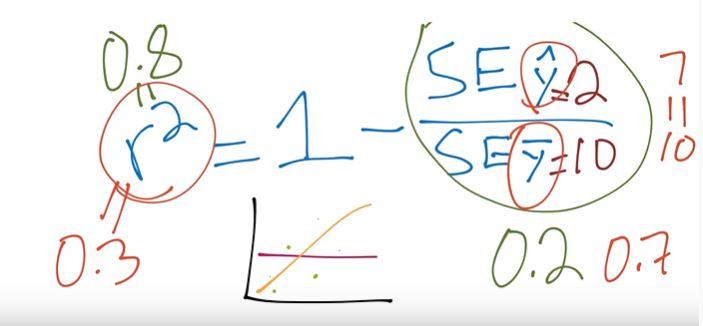

In [40]:
from IPython.display import Image
Image(filename='r_square.jpg')
# higher r2 more better the model

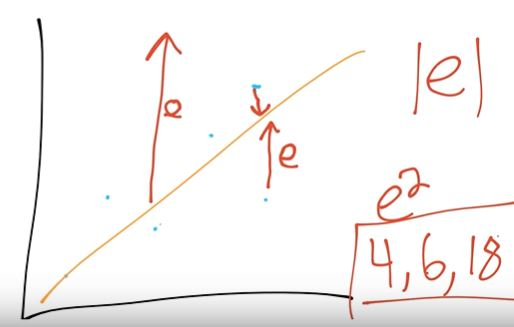

In [41]:
from IPython.display import Image
Image(filename='error.jpg')

In [42]:
# [link]:
# https://www.youtube.com/watch?v=Kpxwl2u-Wgk&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=12